# <font color='#0080ff'> SC1015 DS Project </font>

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.

We use sep='\t' to read tab-delimited data in csv format. 

Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
marketingdata = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\r')
marketingdata= marketingdata.drop(['Z_CostContact','Z_Revenue'],axis=1) #Removing useless columns
marketingdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,\n5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,\n2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,\n4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,\n6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,\n5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We then check the other vital statistics of the data such as its `type` and `shape`

In [4]:
print('Type of the data:', type(marketingdata))
print('Dims of the data:', marketingdata.shape)

Type of the data: <class 'pandas.core.frame.DataFrame'>
Dims of the data: (2241, 27)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [5]:
print(marketingdata.dtypes)

ID                      object
Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Response               float64
dtype: object


---
## <font color = #0080ff> Context </font>
Our group will be exploring this data set on Kaggle which is Customer Personalirt Analysis by Akash Patel.
</br>Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

### <font color = #00cc99>Problem Statement(We can edit)</font>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### <font color = #00cc99>Content </font>

#### **Attributes**

##### <font color = #ff9999>People</font>

>* ID: Customer's unique identifier
>* Year_Birth: Customer's birth year
>* Education: Customer's education level
>* Marital_Status: Customer's marital status
>* Income: Customer's yearly household income
>* Kidhome: Number of children in customer's household
>* Teenhome: Number of teenagers in customer's household
>* Dt_Customer: Date of customer's enrollment with the company
>* Recency: Number of days since customer's last purchase
>* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### <font color = #ff9999>Products</font>

>* MntWines: Amount spent on wine in last 2 years
>* MntFruits: Amount spent on fruits in last 2 years
>* MntMeatProducts: Amount spent on meat in last 2 years
>* MntFishProducts: Amount spent on fish in last 2 years
>* MntSweetProducts: Amount spent on sweets in last 2 years
>* MntGoldProds: Amount spent on gold in last 2 years

##### <font color = #ff9999>Promotion</font>

>* NumDealsPurchases: Number of purchases made with a discount
>* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### <font color = #ff9999>Place</font>

>* NumWebPurchases: Number of purchases made through the company’s website
>* NumCatalogPurchases: Number of purchases made using a catalogue
>* NumStorePurchases: Number of purchases made directly in stores
>* NumWebVisitsMonth: Number of visits to company’s website in the last month

### <font color = #00cc99>Target (We can edit)</font>
We will be performing **Classification** first to identify which factors which results in the greatest response which the customer accept the offer in the last campaign which allows the company to cater towards customers which fall within this category and also come up with new promotions or survey the customers which fall into the other category on why they did not follow up with the offer in the last campaign.

Next we will perform **Clustering** to to cluster and find out which groups are more likely to accept the offer in the last campaign so that the company can focus their promotions to such customers more.

### <font color = #00cc99>Acknowledgement</font>
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


---
## <font color = #0080ff> We will start by setting up a simple Classfication problem</font>
Response Variable : **Response**     
Predictor Feature : **Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds, AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5**   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [6]:
response = pd.DataFrame(marketingdata['Response']).astype('object') #Response
predictor = pd.DataFrame(marketingdata[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]) #Predictor

In [7]:
predictor_list = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

In [8]:
response.info()
print()
predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Response  2240 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2216 non-null   float64
 1   MntWines          2240 non-null   float64
 2   MntFruits         2240 non-null   float64
 3   MntMeatProducts   2240 non-null   float64
 4   MntFishProducts   2240 non-null   float64
 5   MntSweetProducts  2240 non-null   float64
 6   MntGoldProds      2240 non-null   float64
 7   AcceptedCmp1      2240 non-null   float64
 8   AcceptedCmp2      2240 non-null   float64
 9   AcceptedCmp3      2240 non-null   float64
 10  AcceptedCmp4      2240 non-null   float64
 11  AcceptedCmp5   

0.0    1906
1.0     334
Name: Response, dtype: int64 



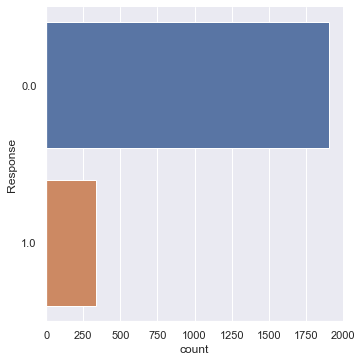

In [9]:
# Summary Statistics for Response
print(response["Response"].value_counts(), '\n')

# Plot the distributions of Response
sb.catplot(y = 'Response', data = response, kind = 'count')

Set up the classification problem with Train and Test datasets. 

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (1680, 1) (1680, 12)
Test Set  : (561, 1) (561, 12)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [11]:
# Summary Statistics for Response
y_train["Response"].value_counts()

0.0    1422
1.0     257
Name: Response, dtype: int64

In [12]:
# Summary Statistics for Predictors
x_train.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
count,1658.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,52332.661037,297.144133,25.881477,167.034544,37.359738,26.959500,43.408577,0.067898,0.012507,0.072662,0.073853,0.076236
std,26601.418164,333.967590,39.521749,229.677592,54.979261,41.371174,51.800961,0.251645,0.111168,0.259659,0.261610,0.265454
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34650.750000,22.000000,1.000000,16.000000,3.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51277.000000,167.000000,7.000000,64.000000,12.000000,8.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68675.750000,492.000000,32.000000,230.000000,46.000000,33.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,1493.000000,197.000000,1725.000000,258.000000,263.000000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000


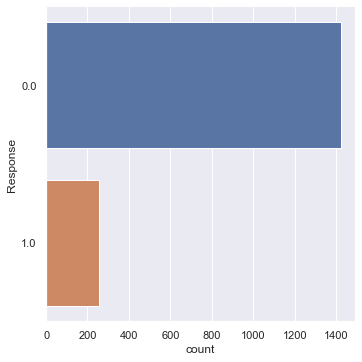

In [13]:
# Draw the distribution of Response
sb.catplot(y = "Response", data = y_train, kind = "count")

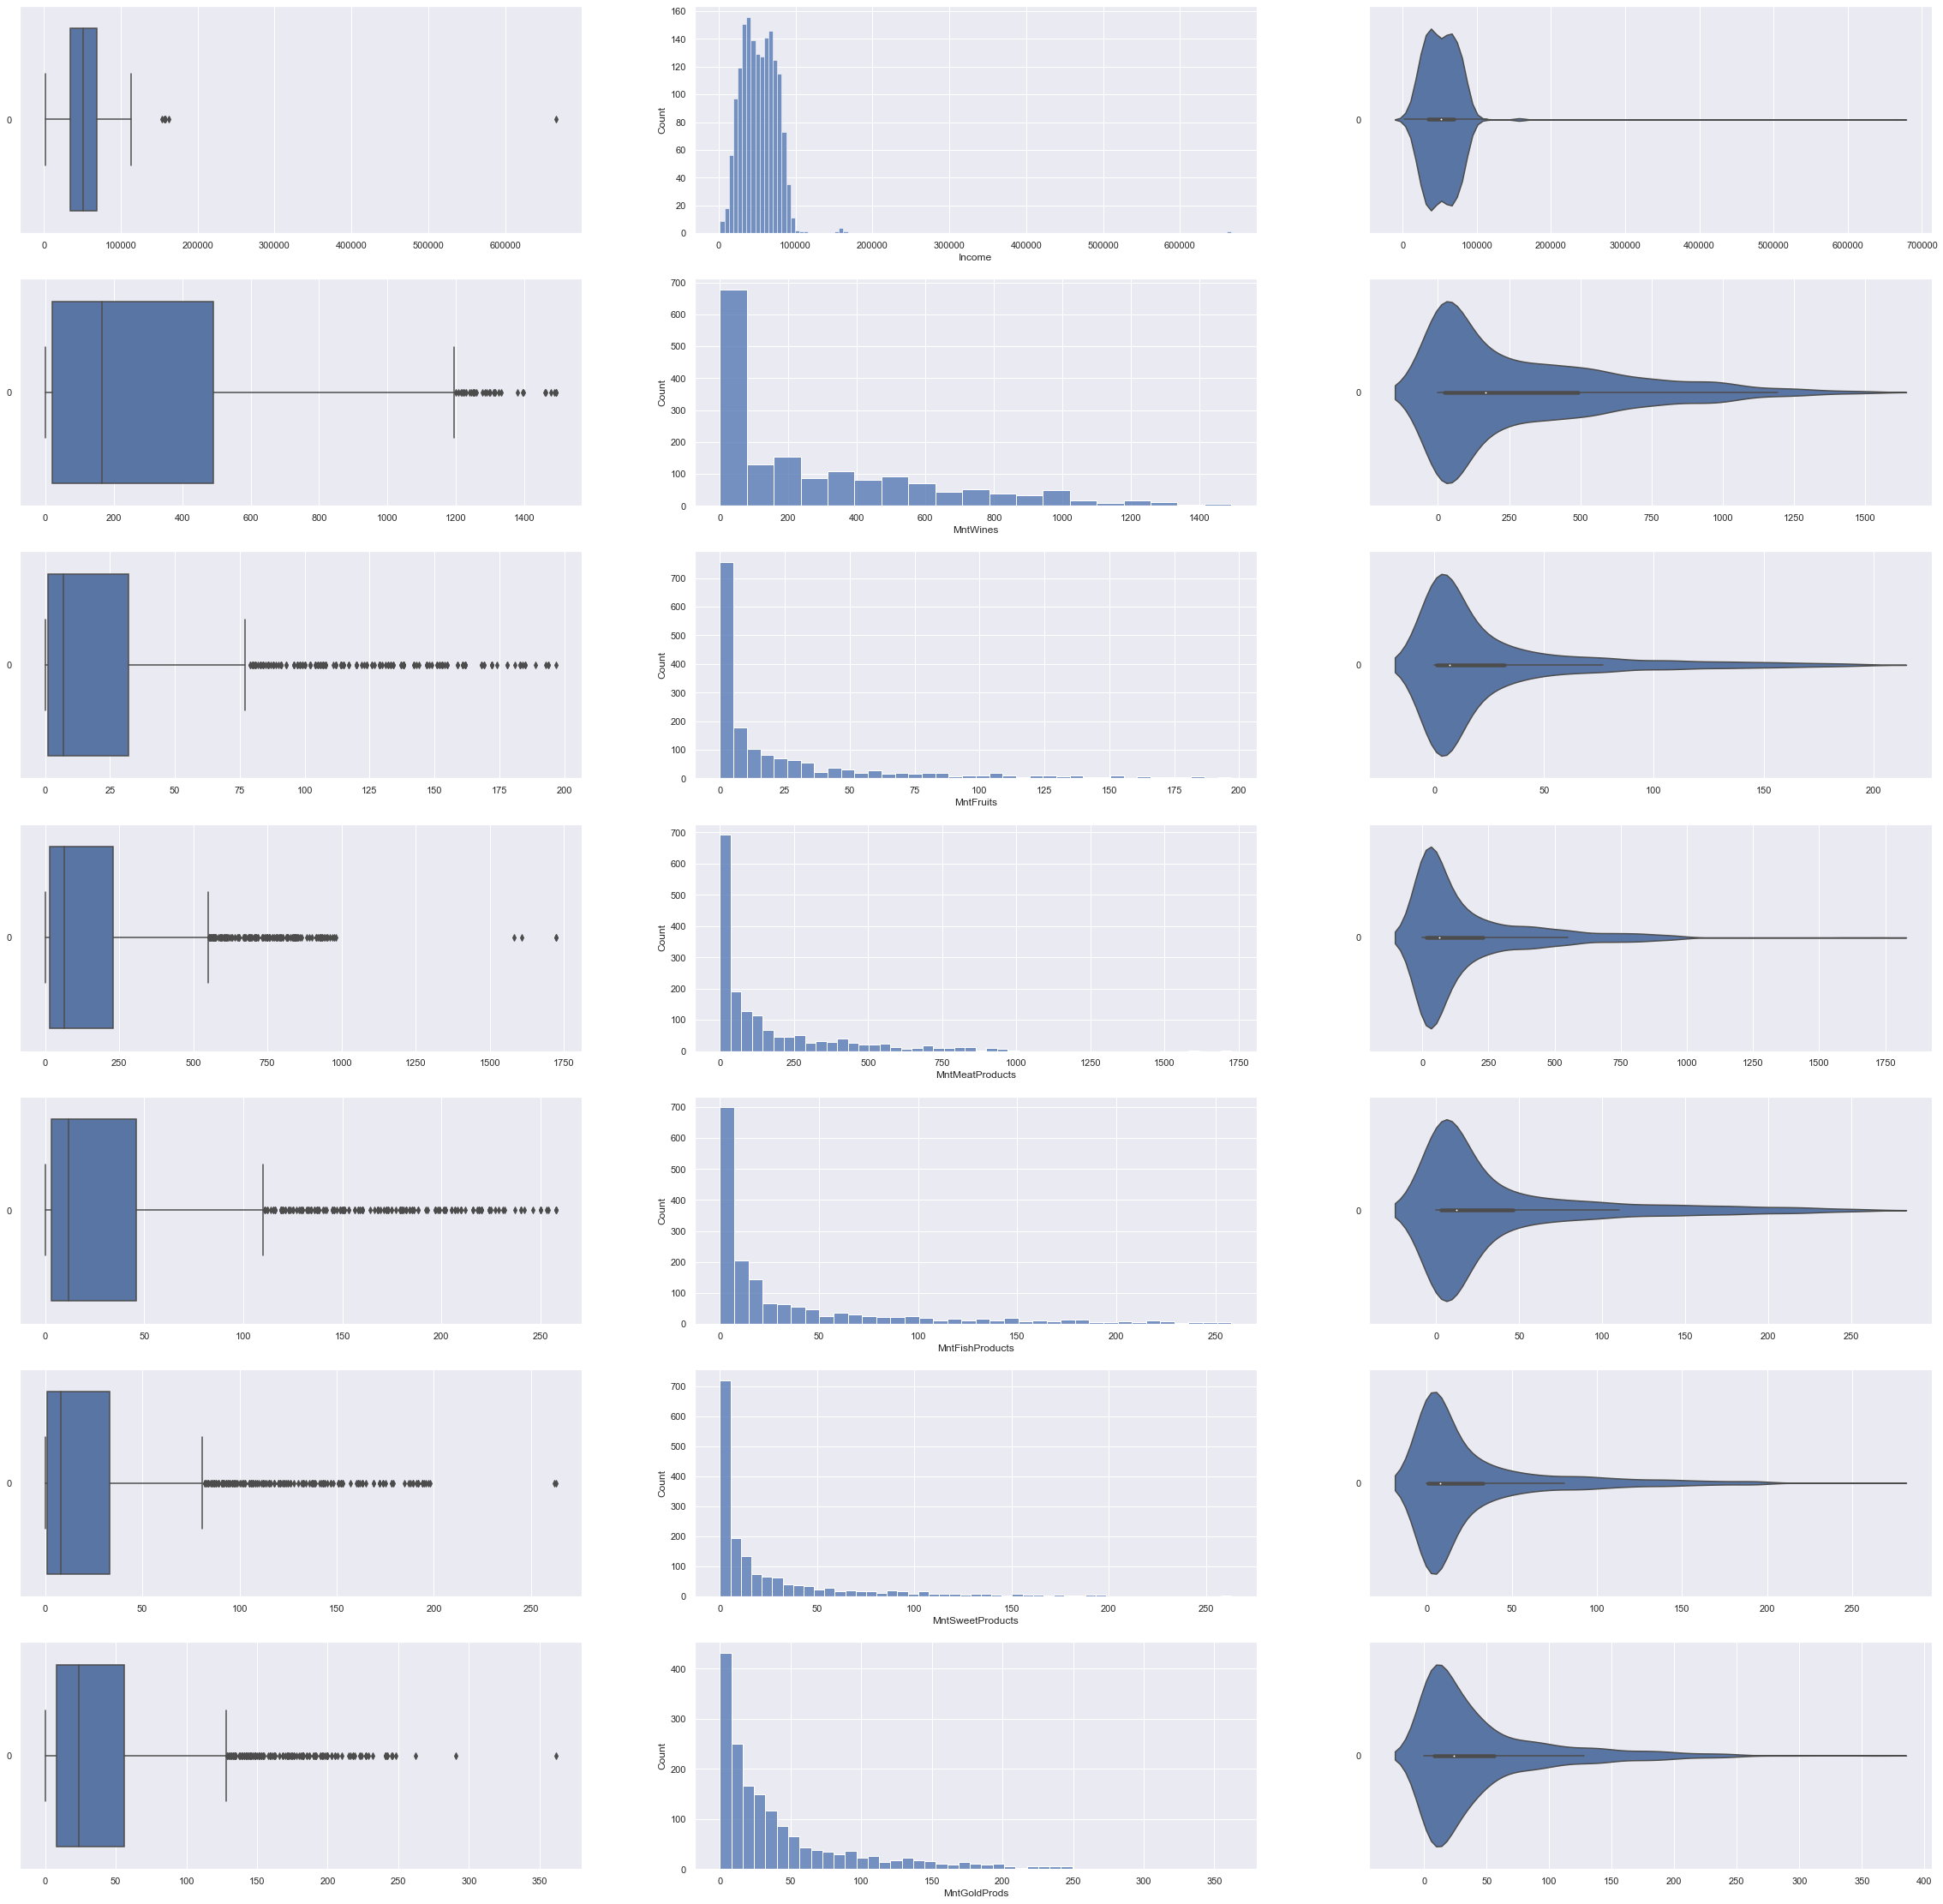

In [14]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(7, 3, figsize=(40, 40))

count = 0
for var in predictor_list:if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
    
        sb.boxplot(data = x_train[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = x_train[var], ax = axes[count,1])
        sb.violinplot(data = x_train[var], orient = "h", ax = axes[count,2])
    count += 1

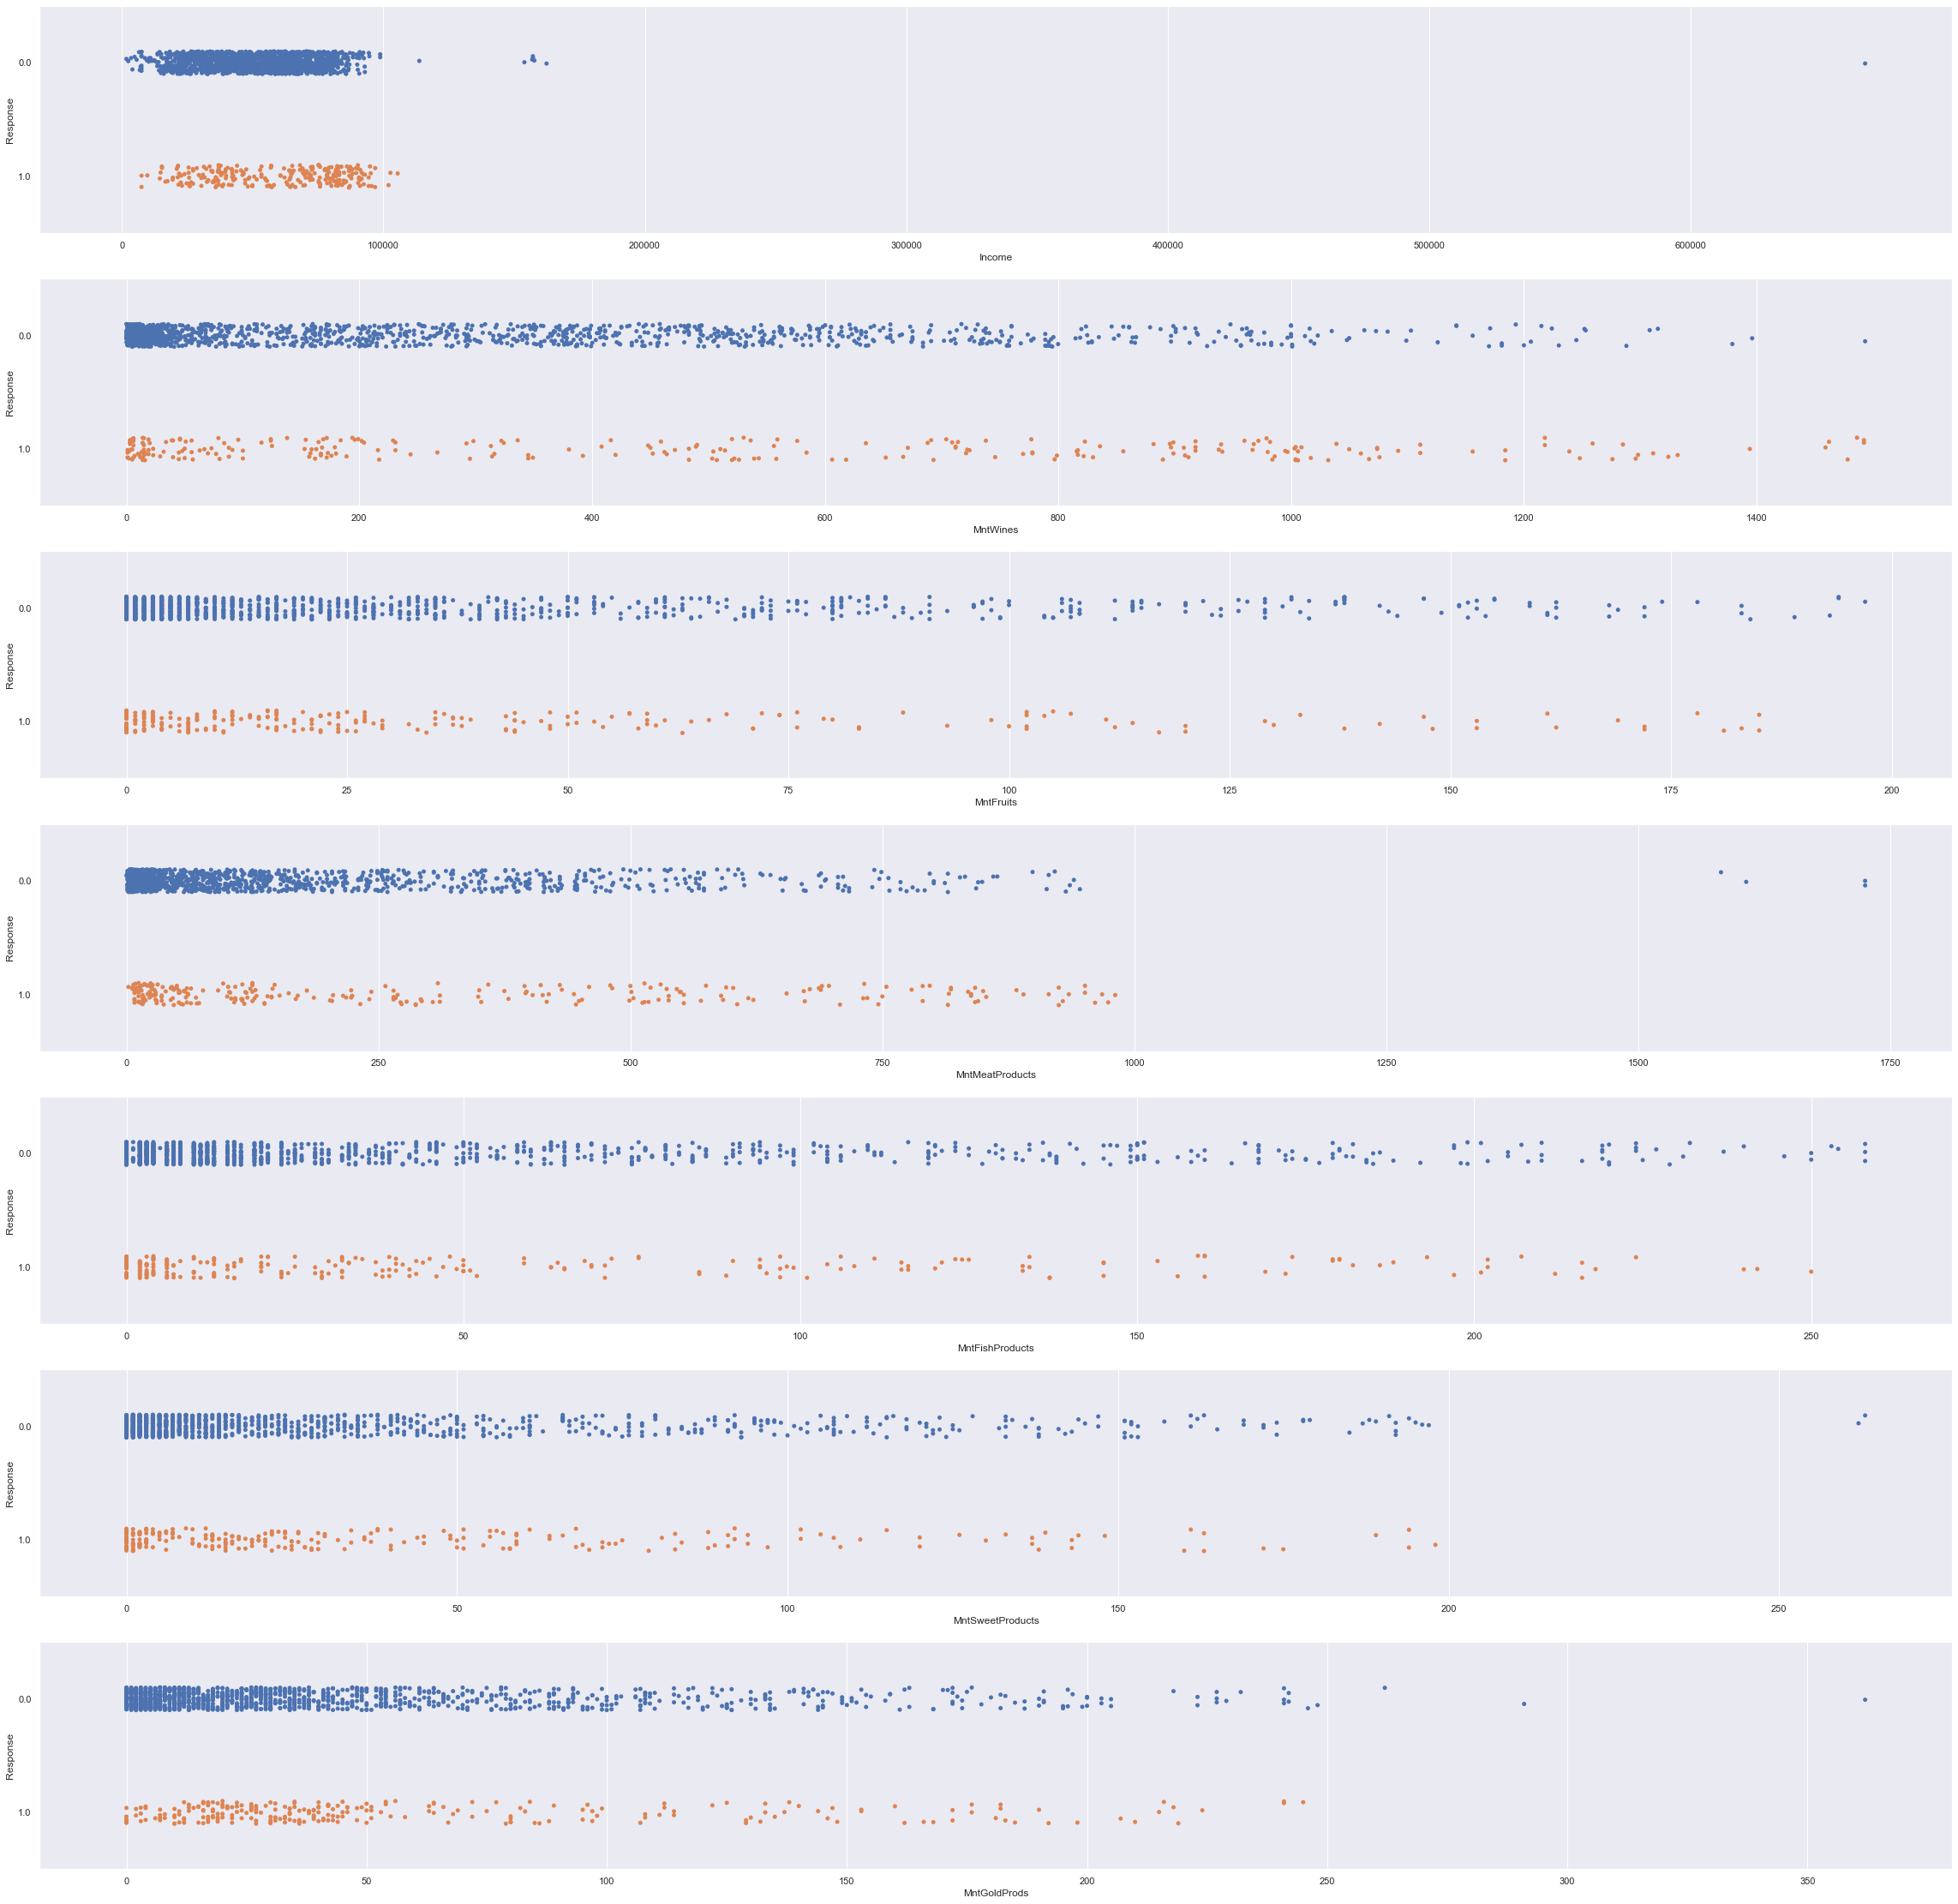

In [34]:
# Relationship between Response and the Predictors which are not Categorical
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)
f, axes = plt.subplots(7, 1, figsize=(40, 40))
count = 0
for var in predictor_list:
    if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
        sb.stripplot(x = var, y = "Response", data = trainDF, orient = "h", ax = axes[count])
    count +=1

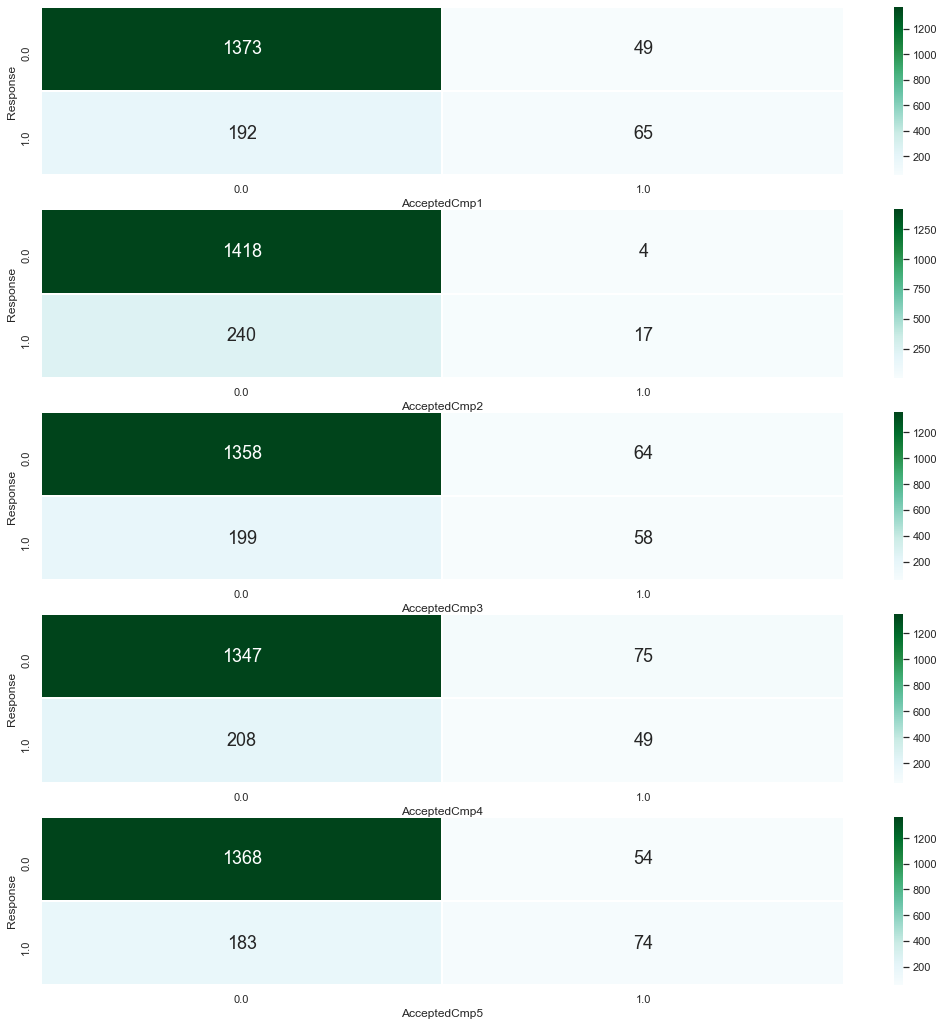

In [45]:
# Relationship between Response and the Predictors which are Categorical
f, axes = plt.subplots(5, 1, figsize=(18, 18))
count = 0
for var in predictor_list:
    if(var in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
        sb.heatmap(trainDF.groupby(['Response', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn",ax = axes[count])
        count +=1

## <font color = #0080ff> We will then use a Random Forest Classifier as an advanced classifier technique</font>

## <font color = #0080ff> We will then compare the effectiveness of classification with clustering</font>